In [30]:
import matplotlib.pyplot as plt

import numpy as np
from numpy.linalg import norm 

from method_functions import GradientDescent, NewtonDescent
from functions import Rosenbrock, RosenbrockH, RosenbrockJ, Bowl, BowlJ, BowlH, Himmelblau, HimmelblauJ, HimmelblauH
from plottingFunctions import PlotHimmelblau

# RESOURCES
# https://people.duke.edu/~ccc14/sta-663-2018/notebooks/S09G_Gradient_Descent_Optimization.html 

Root: [1. 1.] 
	 Number of iterations: 34643
Root: [1. 1.] 
	 Number of iterations: 26


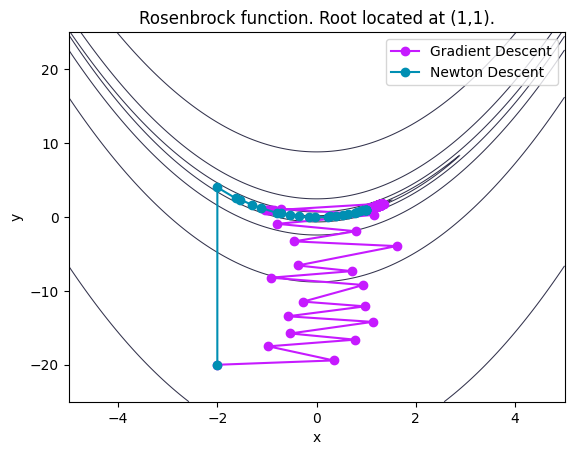

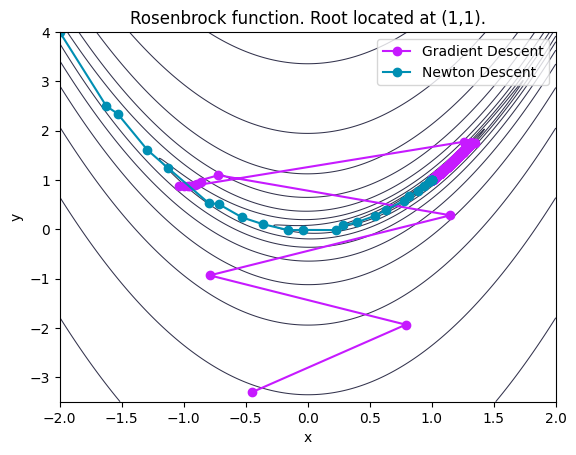

In [31]:
# Initial conditions and parameters
x0 = [-2, -20]; tol = 1e-16; Nmax = 100000

# Finds the roots with Gradient Descent and then returns and prints the output
root, error, iterations, GDSteps = GradientDescent(x0, Rosenbrock, RosenbrockJ, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

# Finds the roots with Newton Descent and then returns and prints the output
root, error, iterations, NDSteps = NewtonDescent(x0, Rosenbrock, RosenbrockJ, RosenbrockH, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

# Converts the lists into numpy arrays for plotting
GDSteps = np.array(GDSteps)
NDSteps = np.array(NDSteps)

# Grid for plotting the function
x = np.linspace(-5, 5, 1000)
y = np.linspace(-25, 25, 1000)
X, Y = np.meshgrid(x, y)
evalPoints = [X, Y]

# Plot of the Rosenbrock function 
plt.plot(GDSteps[:,0], GDSteps[:,1],
            color='#c61aff',
            marker="o",
            zorder=1,
            label="Gradient Descent")
plt.plot(NDSteps[:,0], NDSteps[:,1],
            color='#008fb3',
            marker="o",
            zorder=1,
            label="Newton Descent")
plt.contour(X, Y, Rosenbrock(evalPoints),
            levels=np.logspace(-5, 5, 10),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)
plt.legend(); plt.title("Rosenbrock function. Root located at" + r" (1,1)."); plt.xlabel("x"); plt.ylabel("y")
plt.show()

# Grid for plotting the function
x = np.linspace(-2, 2, 1000)
y = np.linspace(-3.5, 4, 1000)
X, Y = np.meshgrid(x, y)
evalPoints = [X, Y]

# Plot of the Rosenbrock function 
plt.plot(GDSteps[14:,0], GDSteps[14:,1],
            color='#c61aff',
            marker="o",
            zorder=1,
            label="Gradient Descent")
plt.plot(NDSteps[1:,0], NDSteps[1:,1],
            color='#008fb3',
            marker="o",
            zorder=1,
            label="Newton Descent")
plt.contour(X, Y, Rosenbrock(evalPoints),
            levels=np.logspace(-5, 4, 20),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)
plt.legend(); plt.title("Rosenbrock function. Root located at" + r" (1,1)."); plt.xlabel("x"); plt.ylabel("y")
plt.show()

Root: [0. 0.] 
	 Number of iterations: 1
Root: [0. 0.] 
	 Number of iterations: 1


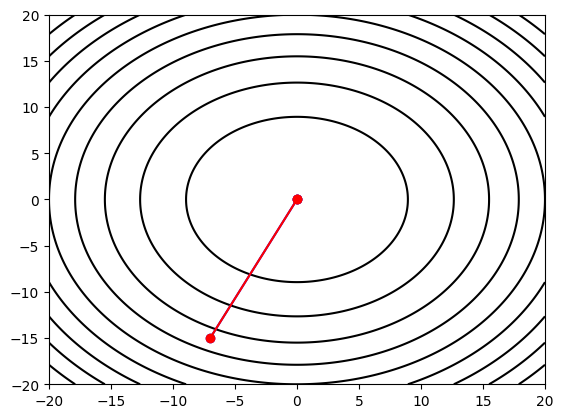

In [32]:
# Initial conditions and parameters
x0 = [-7, -15]; tol = 1e-16; Nmax = 100000

# Finds the roots with Gradient Descent and then returns and prints the output
root, error, iterations, GDSteps = GradientDescent(x0, Bowl, BowlJ, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

# Finds the roots with Newton Descent and then returns and prints the output
root, error, iterations, NDSteps = NewtonDescent(x0, Bowl, BowlJ, BowlH, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

# Converts the lists into numpy arrays for plotting
GDSteps = np.array(GDSteps)
NDSteps = np.array(NDSteps)

# Grid for plotting the function
x = np.linspace(-20, 20, 1000)
y = np.linspace(-20, 20, 1000)
X, Y = np.meshgrid(x, y)
evalPoints = [X, Y]

# Plot of the Rosenbrock function 
plt.plot(GDSteps[:,0], GDSteps[:,1],
            color='blue',
            marker="o",
            zorder=1)
plt.plot(NDSteps[:,0], NDSteps[:,1],
            color='red',
            marker="o",
            zorder=1)
plt.contour(X, Y, Bowl(evalPoints),
            levels=10,
            colors='black',
            zorder=0)
plt.show()

Root: [1. 1.] 
	 Number of iterations: 61970
Root: [1. 1.] 
	 Number of iterations: 1


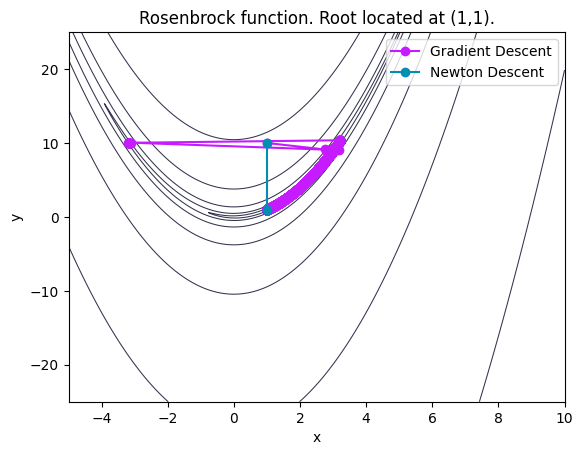

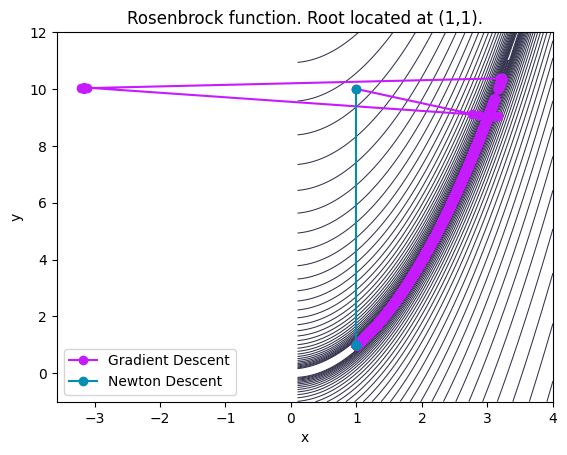

In [33]:
# Initial conditions and parameters
# x0 = [-2, -20]; tol = 1e-16; Nmax = 100000
x0 = [1, 10]; tol = 1e-16; Nmax = 100000

# Finds the roots with Gradient Descent and then returns and prints the output
root, error, iterations, GDSteps = GradientDescent(x0, Rosenbrock, RosenbrockJ, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

# Finds the roots with Newton Descent and then returns and prints the output
root, error, iterations, NDSteps = NewtonDescent(x0, Rosenbrock, RosenbrockJ, RosenbrockH, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

# Converts the lists into numpy arrays for plotting
GDSteps = np.array(GDSteps)
NDSteps = np.array(NDSteps)

# Grid for plotting the function
x = np.linspace(-5, 10, 1000)
y = np.linspace(-25, 25, 1000)
X, Y = np.meshgrid(x, y)
evalPoints = [X, Y]

# Plot of the Rosenbrock function 
plt.plot(GDSteps[:,0], GDSteps[:,1],
            color='#c61aff',
            marker="o",
            zorder=1,
            label="Gradient Descent")
plt.plot(NDSteps[:,0], NDSteps[:,1],
            color='#008fb3',
            marker="o",
            zorder=1,
            label="Newton Descent")
plt.contour(X, Y, Rosenbrock(evalPoints),
            levels=np.logspace(0.5, 35, 40),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)
plt.legend(); plt.title("Rosenbrock function. Root located at" + r" (1,1)."); plt.xlabel("x"); plt.ylabel("y")
plt.show()

# Grid for plotting the function
x = np.linspace(0.1, 4, 1000)
y = np.linspace(-1, 12, 1000)
X, Y = np.meshgrid(x, y)

evalPoints = [X, Y]

# Plot of the Rosenbrock function 
plt.plot(GDSteps[:,0], GDSteps[:,1],
            color='#c61aff',
            marker="o",
            zorder=1,
            label="Gradient Descent")
plt.plot(NDSteps[:,0], NDSteps[:,1],
            color='#008fb3',
            marker="o",
            zorder=1,
            label="Newton Descent")
plt.contour(X, Y, Rosenbrock(evalPoints),
            levels=np.logspace(0.5, 5, 40),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)
plt.legend(); plt.title("Rosenbrock function. Root located at" + r" (1,1)."); plt.xlabel("x"); plt.ylabel("y")
plt.show()

Root using Gradient Descent: [3. 2.] 
	 Number of iterations: 50
Root using Newton Descent: [-3.77931025 -3.28318599] 
	 Number of iterations: 12


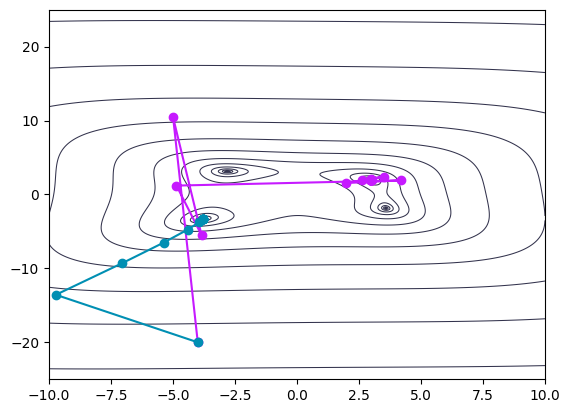

Root using Gradient Descent: [3. 2.] 
	 Number of iterations: 55
Root using Newton Descent: [-2.80511809  3.13131252] 
	 Number of iterations: 10


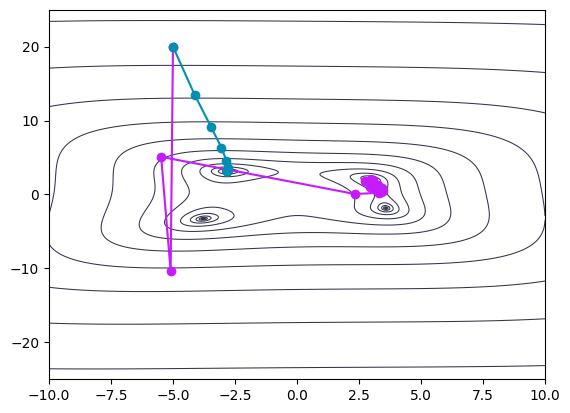

Root using Gradient Descent: [ 3.58442834 -1.84812653] 
	 Number of iterations: 82
Root using Newton Descent: [3. 2.] 
	 Number of iterations: 11


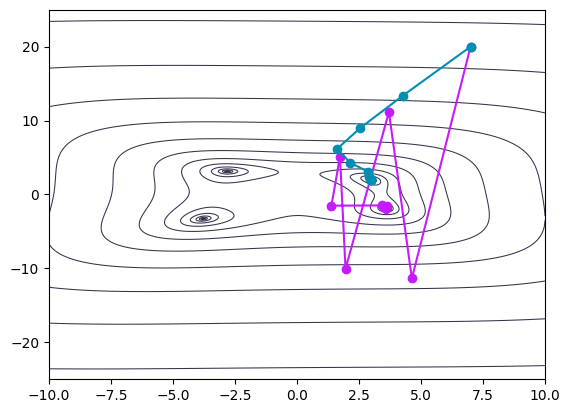

Root using Gradient Descent: [3. 2.] 
	 Number of iterations: 52
Root using Newton Descent: [ 3.58442834 -1.84812653] 
	 Number of iterations: 11


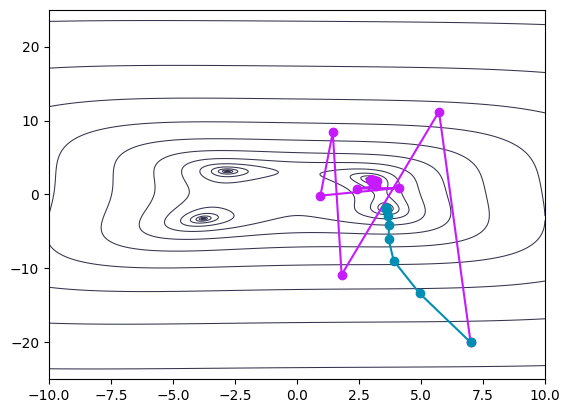

In [34]:
# Initial conditions and parameters
a = 10; b = 25;

# Grid for plotting the function
x = np.linspace(-10, a, 1000)
y = np.linspace(-b, b, 1000)
X, Y = np.meshgrid(x, y)

evalPoints = [X, Y]

plt.contour(X, Y, Himmelblau(evalPoints),
            levels=np.logspace(-20, 6, 50),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)

x0 = [-4, -20]; 
PlotHimmelblau(x0);
plt.show()

plt.contour(X, Y, Himmelblau(evalPoints),
            levels=np.logspace(-20, 6, 50),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)

x0 = [-5, 20]
PlotHimmelblau(x0);
plt.show()

plt.contour(X, Y, Himmelblau(evalPoints),
            levels=np.logspace(-20, 6, 50),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)

x0 = [7, 20];
PlotHimmelblau(x0);
plt.show()

plt.contour(X, Y, Himmelblau(evalPoints),
            levels=np.logspace(-20, 6, 50),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)

x0 = [7, -20];
PlotHimmelblau(x0);
plt.show()

Root: [1. 1.] 
	 Number of iterations: 37622
Root: [1. 1.] 
	 Number of iterations: 26


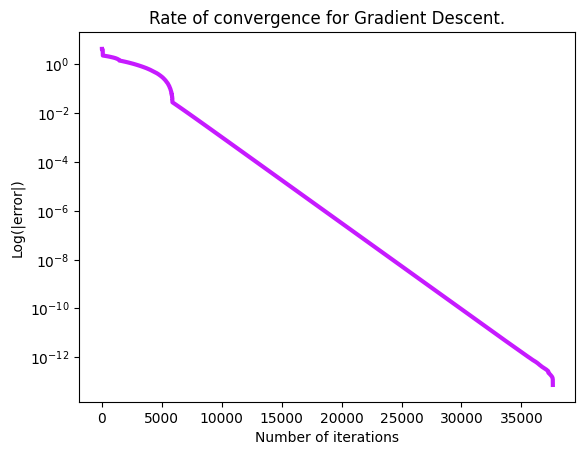

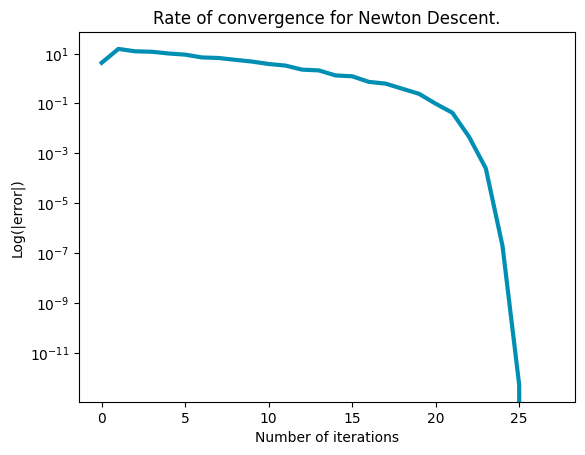

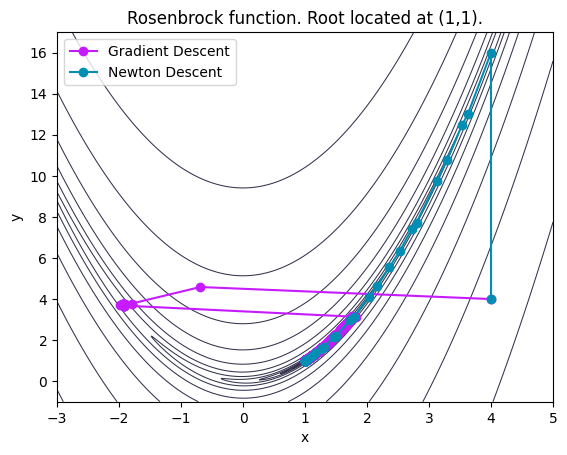

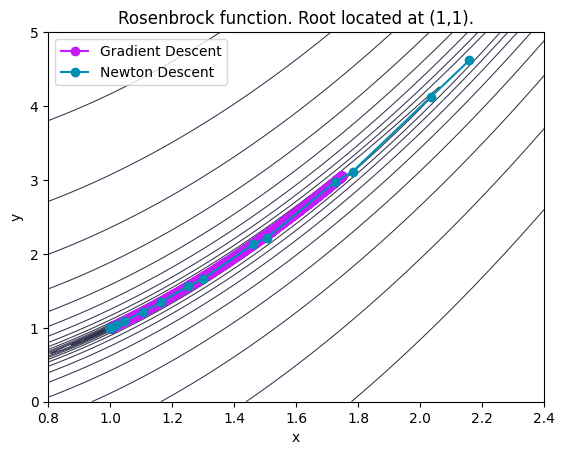

In [35]:
# Initial conditions and other parameters
x0 = [4, 4]; tol = 1e-16; Nmax = 100000

# Finds the roots with Gradient Descent and then returns and prints the output
root, error, iterations, GDSteps = GradientDescent(x0, Rosenbrock, RosenbrockJ, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

# Finds the roots with Newton Descent and then returns and prints the output
root, error, iterations, NDSteps = NewtonDescent(x0, Rosenbrock, RosenbrockJ, RosenbrockH, tol, Nmax)
print("Root:", root, "\n\t Number of iterations:", iterations)

# Converts the lists into numpy arrays for plotting
GDSteps = np.array(GDSteps)
NDSteps = np.array(NDSteps)

# Choice of the true value of the root
x_root = 1; y_root = 1

# Calculation of the error for each of the axes
GD_error = np.array([abs(x_root - GDSteps[:,0]), abs(y_root - GDSteps[:,1])])
ND_error = np.array([abs(x_root - NDSteps[:,0]), abs(y_root - NDSteps[:,1])])

# Calculates the norm distance for each of the iterations
GD_error = np.sum(np.abs(GD_error)**2,axis=0)**(1./2)
ND_error = np.sum(np.abs(ND_error)**2,axis=0)**(1./2)

# Log plot of the error for Gradient Descent
plt.semilogy(GD_error,
             color="#c61aff",
             linewidth=3)
plt.xlabel("Number of iterations"); plt.ylabel("Log(|error|)"); plt.title("Rate of convergence for Gradient Descent.")
plt.show()

# Log plot of the error for Gradient Descent
plt.semilogy(ND_error,
             color="#008fb3",
             linewidth=3)
plt.xlabel("Number of iterations"); plt.ylabel("Log(|error|)"); plt.title("Rate of convergence for Newton Descent.")
plt.show()

# Plot of the Rosenbrock function 
plt.plot(GDSteps[:,0], GDSteps[:,1],
            color='#c61aff',
            marker="o",
            zorder=1,
            label="Gradient Descent")
plt.plot(NDSteps[:,0], NDSteps[:,1],
            color='#008fb3',
            marker="o",
            zorder=1,
            label="Newton Descent")

# Grid for plotting the function
x = np.linspace(-3, 5, 1000)
y = np.linspace(-1, 17, 1000)
X, Y = np.meshgrid(x, y)
evalPoints = [X, Y]

plt.contour(X, Y, Rosenbrock(evalPoints),
            levels=np.logspace(-5, 5, 20),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)
plt.legend(); plt.title("Rosenbrock function. Root located at" + r" (1,1)."); plt.xlabel("x"); plt.ylabel("y")
plt.show()


# Plot of the Rosenbrock function 
plt.plot(GDSteps[300:,0], GDSteps[300:,1],
            color='#c61aff',
            marker="o",
            zorder=1,
            label="Gradient Descent")
plt.plot(NDSteps[10:,0], NDSteps[10:,1],
            color='#008fb3',
            marker="o",
            zorder=1,
            label="Newton Descent")


# Grid for plotting the function
x = np.linspace(0.8, 2.4, 1000)
y = np.linspace(0, 5, 1000)
X, Y = np.meshgrid(x, y)
evalPoints = [X, Y]

plt.contour(X, Y, Rosenbrock(evalPoints),
            levels=np.logspace(-4, 3, 20),
            colors='#33334d',
            linewidths=0.75,
            zorder=0)
plt.legend(); plt.title("Rosenbrock function. Root located at" + r" (1,1)."); plt.xlabel("x"); plt.ylabel("y")
plt.show()